### Healthcare - the cost of quality

#### Q. What is the cost of a medical provider compared to its state?
#### Q. What is the rationale of statewide comparison?

Does state comparison for all treatment make sense? What is a better comparison at the state level?


In [1]:
#install.packages("zipcode")
library(dplyr)
#library(DataExplorer)
#library(xda)
library(ggplot2)
library(plotly)
library(data.table)
library(zipcode)
suppressPackageStartupMessages(library(tidyverse))
library(stringr)
#library(ggthemes)
suppressPackageStartupMessages(library(maps))


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout


Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last



In [2]:
payment <- read.csv("/Users/chriskuo/Downloads/inpatientCharges.csv")

In [5]:
payment %>% arrange(Provider.Id, DRG.Definition) 
head(payment)

DRG.Definition,Provider.Id,Provider.Name,Provider.Street.Address,Provider.City,Provider.State,Provider.Zip.Code,Hospital.Referral.Region.Description,Total.Discharges,Average.Covered.Charges,Average.Total.Payments,Average.Medicare.Payments
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73
057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,38,$20312.78,$4894.76,$3865.50
064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,84,$38820.39,$10260.21,$9167.08
065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W CC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,169,$27345.10,$6542.08,$5438.50
066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,33,$17605.51,$4596.39,$3618.93
069 - TRANSIENT ISCHEMIA,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,37,$20688.83,$4134.10,$3103.40
074 - CRANIAL & PERIPHERAL NERVE DISORDERS W/O MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,13,$18489.15,$4876.00,$4097.23
101 - SEIZURES W/O MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,27,$19619.70,$4667.22,$3249.66
176 - PULMONARY EMBOLISM W/O MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,33,$23680.30,$6020.27,$5338.09
177 - RESPIRATORY INFECTIONS & INFLAMMATIONS W MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,21,$48240.09,$11634.52,$10553.23


DRG.Definition,Provider.Id,Provider.Name,Provider.Street.Address,Provider.City,Provider.State,Provider.Zip.Code,Hospital.Referral.Region.Description,Total.Discharges,Average.Covered.Charges,Average.Total.Payments,Average.Medicare.Payments
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$37560.37,$5434.95,$4453.79
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$13998.28,$5417.56,$4129.16
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$31633.27,$5658.33,$4851.44
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10023,BAPTIST MEDICAL CENTER SOUTH,2105 EAST SOUTH BOULEVARD,MONTGOMERY,AL,36116,AL - Montgomery,67,$16920.79,$6653.80,$5374.14


In [6]:
# Convert the average to numeric
p1 <- strsplit(x = as.character(payment$Average.Covered.Charges),split = "$",fixed = T)
payment$Average.Covered.Charges <- as.numeric(sapply(p1,"[[",2))
p1 <- strsplit(x = as.character(payment$Average.Total.Payments),split = "$",fixed = T)
payment$Average.Total.Payments <- as.numeric(sapply(p1,"[[",2))
p1 <- strsplit(x = as.character(payment$Average.Medicare.Payments),split = "$",fixed = T)
payment$Average.Medicare.Payments <- as.numeric(sapply(p1,"[[",2))
rm("p1")

In [27]:
summary(payment)
colnames(payment)

                                                                  DRG.Definition  
 194 - SIMPLE PNEUMONIA & PLEURISY W CC                                  :  3023  
 690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC                         :  2989  
 292 - HEART FAILURE & SHOCK W CC                                        :  2953  
 392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC            :  2950  
 641 - MISC DISORDERS OF NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES W/O MCC:  2899  
 871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC                :  2812  
 (Other)                                                                 :145439  
  Provider.Id                       Provider.Name   
 Min.   : 10001   GOOD SAMARITAN HOSPITAL  :   633  
 1st Qu.:110092   ST JOSEPH MEDICAL CENTER :   427  
 Median :250007   MERCY MEDICAL CENTER     :   357  
 Mean   :255570   MERCY HOSPITAL           :   347  
 3rd Qu.:380075   ST JOSEPH HOSPITAL       :   343  
 Max.   :670077   

[1] "DRG.Definition"                      
 [2] "Provider.Id"                         
 [3] "Provider.Name"                       
 [4] "Provider.Street.Address"             
 [5] "Provider.City"                       
 [6] "Provider.State"                      
 [7] "Provider.Zip.Code"                   
 [8] "Hospital.Referral.Region.Description"
 [9] "Total.Discharges"                    
[10] "Average.Covered.Charges"             
[11] "Average.Total.Payments"              
[12] "Average.Medicare.Payments"

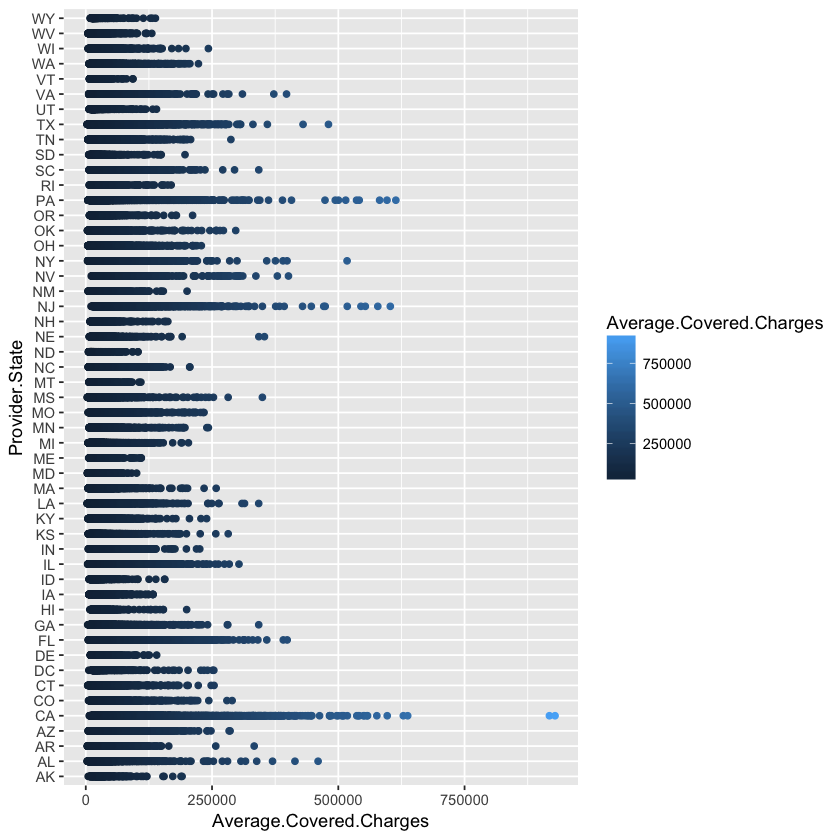

In [11]:
payment <- as.data.table(payment)
av1 <- payment[,Average.Covered.Charges,by=Provider.State]
ggplot(data = av1,mapping = aes(y = Provider.State,x = Average.Covered.Charges,colour=Average.Covered.Charges))+
  geom_point()

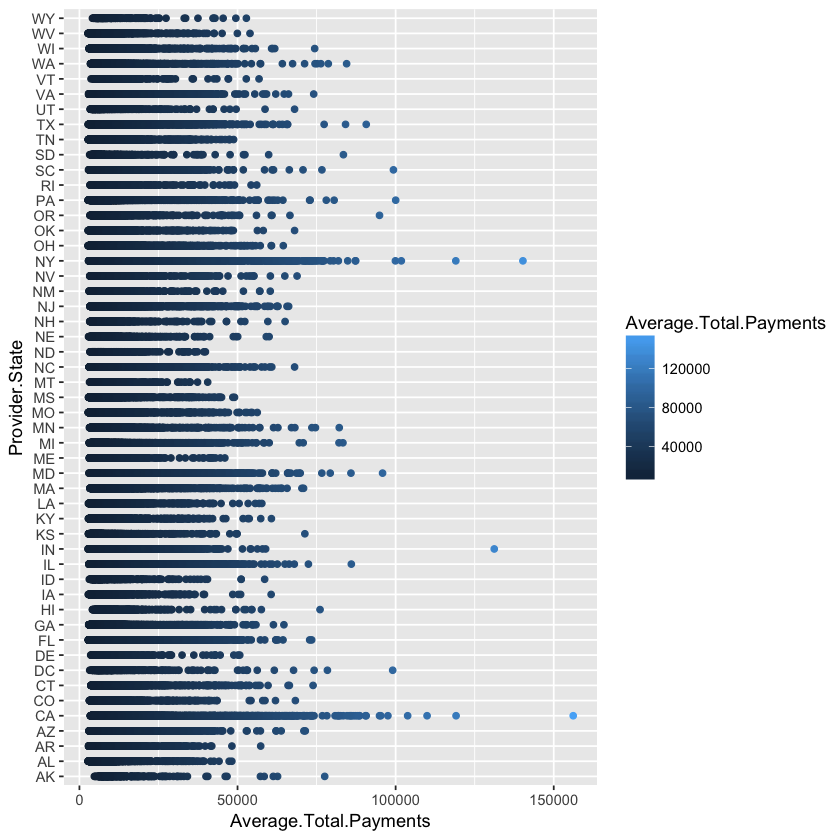

In [13]:
av1 <- payment[,Average.Total.Payments,by=Provider.State]

ggplot(data = av1,mapping = aes(y = Provider.State,x = Average.Total.Payments,colour=Average.Total.Payments))+
  geom_point()

In [59]:
V1 <- payment %>% # aggregate procedures for each hospital
  group_by(Provider.Id, Provider.Zip.Code, Provider.Name) %>% # keep zip & name
  summarise(procSum = sum(Total.Discharges) ) 

# merge aggregated hospital data with zipcode, copy lat+lon for each hospital
V2 <- merge(V1,zipcode, by.x= "Provider.Zip.Code", by.y= "zip")

g <- list( 
  scope = 'usa',
  projection = list(type = 'albers usa'),
  showland = TRUE,
  subunitwidth = 1,
  countrywidth = 1
)
V1 <- payment %>% # aggregate procedures for each hospital
  group_by(Provider.Id, Provider.Zip.Code, Provider.Name) %>% # keep zip & name
  summarise(procSum = sum(Total.Discharges) ) 

V2 <- merge(V1,zipcode, by.x= "Provider.Zip.Code", by.y= "zip")

head(V2)
g <- list( 
  scope = 'usa',
  projection = list(type = 'albers usa'),
  showland = TRUE,
  subunitwidth = 1,
  countrywidth = 1
)
k<-plot_ly(V2, lon = longitude, lat = latitude , 
        text = paste(Provider.Name, city,procSum, sep = "\n"),
        marker = list(size = sqrt(procSum/50) + 1, line = list(width = 0)),
        type = 'scattergeo', locationmode = 'USA-states') %>%
  layout(title = 'aggregated procedure counts at US hospitals', geo = g)
setwd("/Users/chriskuo/Downloads")
embed_notebook(k)

Provider.Zip.Code,Provider.Id,Provider.Name,procSum,city,state,latitude,longitude
10003,330169,BETH ISRAEL MEDICAL CENTER,10395,New York,NY,40.73251,-73.98935
10016,330214,NYU HOSPITALS CENTER,6619,New York,NY,40.74618,-73.97759
10016,330204,BELLEVUE HOSPITAL CENTER,1324,New York,NY,40.74618,-73.97759
10021,330119,LENOX HILL HOSPITAL,5591,New York,NY,40.76842,-73.96045
10021,330270,HOSPITAL FOR SPECIAL SURGERY,3956,New York,NY,40.76842,-73.96045
10021,330101,NEW YORK-PRESBYTERIAN HOSPITAL,16834,New York,NY,40.76842,-73.96045


ERROR: Error in plot_ly(V2, lon = longitude, lat = latitude, text = paste(Provider.Name, : object 'longitude' not found
